In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [4]:
cdf.isnull().sum()

ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
CO2EMISSIONS            0
dtype: int64

In [5]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_HWY   1067 non-null   float64
 4   FUELCONSUMPTION_COMB  1067 non-null   float64
 5   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 50.1 KB


In [6]:
cdf.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,488.000000


In [7]:
cdf.shape

(1067, 6)

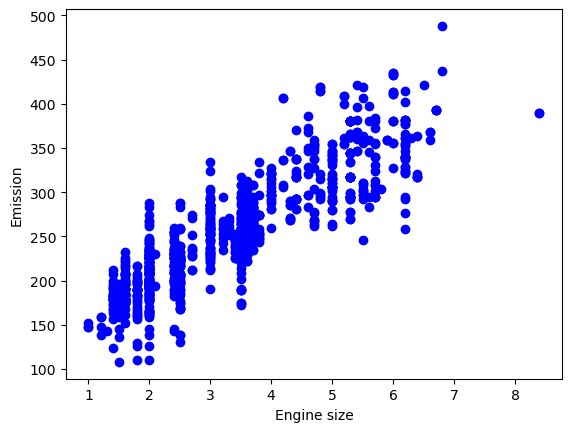

In [8]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

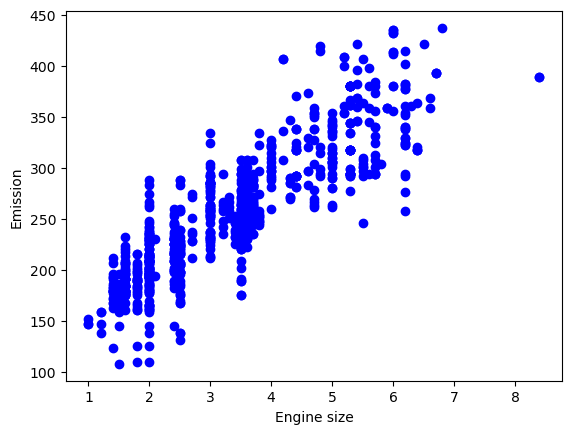

In [10]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

In [11]:
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(x,y)

print('Coefficient:',regr.coef_)

Coefficient: [[10.06780171  8.00013294  9.72331353]]


In [12]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of square: %.2f'% np.mean((y_hat-y)**2))
print('Varianve score:%.2f' %regr.score(x,y))



Residual sum of square: 583.37
Varianve score:0.86


C:\Users\malik bros\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Loan data and linear model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
df = pd.read_csv('Loan data.csv')
df.head(4)

,age,credit-rating,children,loan
0,19,27.900,0,16884.92400
1,18,42.130,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061


In [15]:
y = df['loan']
x = df[['age','credit-rating','children']]

In [16]:
linear_regress = LinearRegression()

In [17]:
linear_regress.fit(x,y)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)

LinearRegression(normalize=False)

In [18]:
y_pred = linear_regress.predict(x)
y_pred

array([ 6905.67009648, 11905.93561283, 12380.97319543, ...,
        9619.93282423,  6693.03658583, 17384.88715381])